# Exploring Terms in the Encyclopaedia Britannica


### Loading the necessary libraries

In [3]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
import collections
import matplotlib as mpl

In [4]:
import pandas as pd
from yaml import safe_load
from pandas.io.json import json_normalize

## We have dataframe with these information

- definition:           Definition of the article
- edition_num:          1,2,3,4,5,6,7,8
- header:               Header of the page's article                                  
- num_article_words:    Number of words per article
- place:                Place where the volume was edited (e.g. Edinburgh)                                    
- related_terms:        Related articles (see X article)  
- source_text_file:     File Path of the XML file from which the article belongs       
- term:                 Article name                            
- term_id_in_page:      Number of article in the page     
- page_num:                 Page Number
- title:               Title of the Volume
- type_article:            Type of Page [Full Page| Topic| Mix | Articles]                                       
- year:                 Year of the Volume
- volume:               volume (e.g. 1)
- letters:              leters of the volume (A-B)
- edition_num:           1,2,3,4,5,6,7,8


### 1. Load dataframe from JSON file

In [7]:
df = pd.read_json('./results_NLS/results_eb_1_edition_postprocess_dataframe', orient="index") 

In [8]:
df

,definition,edition_num,header,letters,num_article_words,page_num,place,related_terms,source_text_file,term,term_id_in_page,title,type_article,volume,year
0,n*s-f 7^' v L i A j J ^ /^^W / ; H:;^’ J }r-r£...,1,iiiubnsfvnsfv,A-B,58,2,Edinburgh,[],nls-data-encyclopaediaBritannica/alto/18808273...,IIIUBNSFVNSFV,0,"Encyclopaedia Britannica; or, A dictionary of ...",FullPage,1,1771
1,S :u -I >;J .1 M U a C V',1,**■*,A-B,10,8,Edinburgh,[],nls-data-encyclopaediaBritannica/alto/18808281...,FIRSTARTICLE,0,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771
10,"the name of two rivers, one in the country of ...",1,EncyclopaediaBritannica,A-B,19,15,Edinburgh,[],nls-data-encyclopaediaBritannica/alto/18808290...,AADE,3,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771
100,"of heresy, the solemn recantation of any doftr...",1,ABLABR,A-B,12,19,Edinburgh,[],nls-data-encyclopaediaBritannica/alto/18808295...,ABJURATION,9,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771
1000,"oc Alces, in zoology, the trivial name of a sp...",1,ALcALC,A-B,22,109,Edinburgh,[CERVUS],nls-data-encyclopaediaBritannica/alto/18808412...,ALCE,4,"Encyclopaedia Britannica; or, A dictionary of ...",Article,1,1771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"in optics, a lens convex on one side, and conc...",1,MENMEIt,M-Z,14,194,Edinburgh,[OPTICS],nls-data-encyclopaediaBritannica/alto/14480694...,MENISCUS,16,"Encyclopaedia Britannica; or, A dictionary of ...",Article,3,1771
9996,"in botany, a genus of the dioecia do-' decandr...",1,MENMEIt,M-Z,42,194,Edinburgh,[],nls-data-encyclopaediaBritannica/alto/14480694...,MENISPEMUM,17,"Encyclopaedia Britannica; or, A dictionary of ...",Article,3,1771
9997,"a fed! of baptrlls in Holland, so called from ...",1,MENMEIt,M-Z,96,194,Edinburgh,[],nls-data-encyclopaediaBritannica/alto/14480694...,MENNONITES,18,"Encyclopaedia Britannica; or, A dictionary of ...",Article,3,1771
9998,"the Greek calendar, in which the lives of the ...",1,MENMEIt,M-Z,28,194,Edinburgh,[],nls-data-encyclopaediaBritannica/alto/14480694...,MENOLOGY,19,"Encyclopaedia Britannica; or, A dictionary of ...",Article,3,1771


### 2. Group results by year

In [93]:
df.groupby("year").count()

,term,definition,related_terms,num_article_words,header,page_num,term_id_in_page,type_article,edition_num,volume,letters,title,place,source_text_file
year,,,,,,,,,,,,,,
1771,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395,14395
1773,14628,14628,14628,14628,14628,14628,14628,14628,14628,14628,14628,14628,14628,14628


#### Remark:
So, we have 14395 terms in 1771 and 14628 terms in 1773. Note, that some of those terms can be repeated

### 3. Group results by letters

In [94]:
df.groupby("letters").count()

,term,definition,related_terms,num_article_words,header,page_num,term_id_in_page,type_article,edition_num,volume,year,title,place,source_text_file
letters,,,,,,,,,,,,,,
A-B,8553,8553,8553,8553,8553,8553,8553,8553,8553,8553,8553,8553,8553,8553
C-L,10567,10567,10567,10567,10567,10567,10567,10567,10567,10567,10567,10567,10567,10567
M-Z,9903,9903,9903,9903,9903,9903,9903,9903,9903,9903,9903,9903,9903,9903


### 4. Group results by letters and years

In [95]:
df.groupby(['year', 'letters'])["letters"].count()

year  letters
1771   A-B       4204
       C-L       5325
       M-Z       4866
1773   A-B       4349
       C-L       5242
       M-Z       5037
Name: letters, dtype: int64

#### Remark:
Note, that some of those terms can be repeated

### 5. Filtering by TERMS: ABACUS

We are going to explore the term ABACUS

Notice that the first edition of the EB, there 6 volumes, 3 published in 1771, and 3 published in 1773. However, the volumes from 1773 are a re-print from the ones of 1771. 

In [98]:
df_by_term=df.groupby(['term', 'year'])["term"].count()
df_by_term["ABACUS"]


year
1771    4
1773    2
Name: term, dtype: int64

### 5.1 Exploring ABACUS in 1771

We are going to explore the term "ABACUS" in the volumes from 1771.

In [96]:
abacus_df= df[df['term'].str.contains("ABACUS")]
abacus_df = abacus_df[abacus_df['year'] == 1771]
abacus_df

,term,definition,related_terms,num_article_words,header,page_num,term_id_in_page,type_article,edition_num,volume,letters,year,title,place,source_text_file
27,ABACUS,"a table strewed over with dust or sand, upon w...",[],23,EncyclopaediaBritannica,15,20,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808290...
28,ABACUS,"in architeflure, signifies the superior part o...",[],122,EncyclopaediaBritannica,15,21,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808290...
29,ABACUS,is also the name of an ancient instrument for ...,[],125,ABAABB,16,1,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808291...
30,ABACUS,"logijlicus, a right-angled triangle, whose sid...",[],50,ABAABB,16,2,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808291...


#### Remark:
So, the TERM "ABACUS" appears 4 times, across two pages. 

#### 5.2 Getting the definnition for each of them 

In [97]:
for i in abacus_df["definition"]:
    print ("ABACUS - Definition: %s" %i)
    print("---")

ABACUS - Definition: a table strewed over with dust or sand, upon which the ancient mathematicians drew their figures, It also signified a cupboard, or buffet.
---
ABACUS - Definition: in architeflure, signifies the superior part or member of the capital of a column, and serves as a kind of crowning to both. It was originally intended to represent a square tile covering a basket. The form of the abacus is not the same in all orders: in the Tuscan, Doric, and Ionic, it‘is generally square; but in the Corinthian and Compofite, its four sides are arched ir Avards, and embellilhed in the middle withornament, as a rose or other flower, Scammozzi uses abacus for a concave moulding on the capital of the Tuscan pedefial; and Palladio calls the plinth above the echinus, or boultin, in the Tufean and Doric orders, by the same name. See plate I. fig. i. and
---
ABACUS - Definition: is also the name of an ancient instrument for facilitating operations in arithmetic. It is vadoully contrived. That 

#### 5.3 Creating groups of terms and years

In [34]:
df.groupby(['term', 'year']).groups.keys()

dict_keys([('A', 1771), ('A', 1773), ('AA', 1771), ('AA', 1773), ('AAB', 1773), ('AABAM', 1771), ('AACH', 1771), ('AADE', 1771), ('AAHUS', 1771), ('AAIRAM', 1773), ('AAITHMEVTIGK', 1773), ('AAM', 1771), ('AAR', 1771), ('AARSEO', 1771), ('AATTER', 1771), ('AB', 1771), ('AB', 1773), ('ABA', 1771), ('ABAC', 1771), ('ABACATUAIA', 1771), ('ABACH', 1771), ('ABACISCUS', 1771), ('ABACO', 1771), ('ABACOT', 1771), ('ABACRE', 1771), ('ABACTORES', 1771), ('ABACTUS', 1771), ('ABACUS', 1771), ('ABACUS', 1773), ('ABADAN', 1771), ('ABADAN', 1773), ('ABADDON', 1771), ('ABADDON', 1773), ('ABADIR', 1771), ('ABADIR', 1773), ('ABAFT', 1771), ('ABAFT', 1773), ('ABAI', 1771), ('ABAISED', 1771), ('ABAISED', 1773), ('ABAISSE', 1771), ('ABAISSE', 1773), ('ABALIENATION', 1771), ('ABALIENATION', 1773), ('ABANBO', 1771), ('ABANBO', 1773), ('ABANCAI', 1771), ('ABANCAI', 1773), ('ABANO', 1771), ('ABANO', 1773), ('ABAPTISTON', 1771), ('ABAPTISTON', 1773), ('ABARCA', 1771), ('ABARCA', 1773), ('ABARTICULATION', 1771), 

In [35]:
len(df.groupby(['term']).groups['ABACUS'])

6

### 6. Grouping the results by TERM, YEAR and DEFINITION

Group data by term and years, and count each group. This will help us to see how many times each term is repeated by year. 

In [36]:
a=df.groupby(['term', 'year'])['definition'].count()
a

term         year
A            1771    7
             1773    3
AA           1771    2
             1773    3
AAB          1773    1
                    ..
ZYGOMA       1771    1
             1773    1
ZYGOMATICUS  1773    1
ZYGOPHYLLUM  1771    1
             1773    1
Name: definition, Length: 27022, dtype: int64

**Remark**: This means that the term "A" appears 7 times  in 1771, and 3 times in 1773. 

#### 6.1 Obtaining for each term, its years and the definitions

We are going to create groups of ("TERM", "YEAR"), and for each of those groups, we are going to print their definition.

**Remark**: I am going to restrict them to 10 groups. 

In [19]:
groups = df[['term', 'year', 'definition']].groupby(['term', 'year'])
cont = 0
for group_key, group_value in groups:
    group = groups.get_group(group_key)
    print(group)
    print("---- Len of this group: %s - group_key %s " %(len(group), group_key))
    cont+=1
    if cont > 10:
        break


      term  year                                         definition
1006     A  1771                                    See Alchemilla.
1088     A  1771  gives a—by and “ the investigation of that sur...
12753    A  1771  r Y\ C / 7 f C.A ( ^y \ ~^\ \ C' A h \A v m aa...
12754    A  1771  I -w 'i <? ^' 0 IY\, y f‘ 1 A_-A IV^-/Y\< -'/W...
13438    A  1771  /kins may be tawed : but thc-se chiefly used f...
3467     A  1771  -Bladder, in physiology. See Air. ^//-Bladders...
7350     A  1771  in London is cieditor to (B) in Paris, value 1...
---- Len of this group: 7 - group_key ('A', 1771) 
      term  year                                         definition
21885    A  1773  in London is creditor to (B) in Paris, value t...
25655    A  1773  l class. ' The calix consists of five leaves, ...
27346    A  1773  are petals, hollow m their lower part, but in ...
---- Len of this group: 3 - group_key ('A', 1773) 
      term  year                                         definition
10101   AA  17

#### 6.2 Exploring how many times each term appears per year

Now, lets get the size of those groups, so we can see how many definitions we have per term and per year.
This exactly the same that we did in the 6.1, but having the results in dataframe format.

In [20]:
g_year_term=df.groupby(['term', 'year']).size().reset_index()
g_year_term

,term,year,0
0,A,1771,7
1,A,1773,3
2,AA,1771,2
3,AA,1773,3
4,AAB,1773,1
...,...,...,...
27017,ZYGOMA,1771,1
27018,ZYGOMA,1773,1
27019,ZYGOMATICUS,1773,1
27020,ZYGOPHYLLUM,1771,1


#### 6.2.1 Grouping the previous results per year. 
This will give us the number of terms that we have per year. 
**Remember that a term can appear several time per volume**.

In [38]:
g_year_term.groupby(['year']).size()

year
1771    13351
1773    13671
dtype: int64

#### 6.3 Exploring in how many years each term appears across years

Here we are interested to explore, for each unique term, in how many years appears. 

**Remark**: In the first eddition of the EB, 3 volumes (A-B, C-L, and M-Z) are published in two years: 1771 and 1773. So, the miminum time that each term appears in the first eddition is one, being two the maximum number of times. 

In [40]:
#here we get if a term appears 1 or in 2 sub_edditions. 
terms_per_ed=g_year_term[['term', 'year']].groupby(['term']).count()
#print(terms_per_ed.max())
terms_per_ed

,year
term,
A,2
AA,2
AAB,1
AABAM,1
AACH,1
...,...
ZUYDERSEE,2
ZWEIBRUGGEN,2
ZYGOMA,2


This means that the term "A" appears in two years. And the term "AAB" only appears in one year

#### 6.3.1 Exploring the terms that only appear in 1 year

In [43]:
terms_only_once=terms_per_ed[terms_per_ed["year"]<2].reset_index()
terms_only_once

,term,year
0,AAB,1
1,AABAM,1
2,AACH,1
3,AADE,1
4,AAHUS,1
...,...,...
5019,ZEGILETHRON,1
5020,ZFORTIFICATION,1
5021,ZINC,1
5022,ZPARTVI,1


Spliting the previous results, so we can know how many terms (that only appears once), correspond to "1771" and to "1773" years.

In [46]:
list_terms_once=terms_only_once["term"].to_list()
cont_dict={1771:0, 1773:0}

for i in list_terms_once:
    i_year=g_year_term.loc[g_year_term['term'] == i]["year"].to_string(index=False)

    cont_dict[int(i_year)]+=1
cont_dict

{1771: 2352, 1773: 2672}

**Remark**: This means that 2352 UNIQUE terms appear only in 1771. And 2672 UNIQUE terms appear only in 1773. 

#### 6.3.2 Exploring the terms that only appear in 2 years

In [47]:
terms_more_once=terms_per_ed[terms_per_ed["year"]>1].reset_index()
terms_more_once

,term,year
0,A,2
1,AA,2
2,AB,2
3,ABACUS,2
4,ABADAN,2
...,...,...
10994,ZUTPHEN,2
10995,ZUYDERSEE,2
10996,ZWEIBRUGGEN,2
10997,ZYGOMA,2


## Related Terms

In [111]:
import networkx as nx
import matplotlib.pyplot as plt

In [130]:
def create_graph_df(df, num):

    graph_df = nx.from_pandas_edgelist(df.head(n=num), source='term', target='related_terms', edge_attr=True)
    return graph_df
   

### Selecting the volumes 1771

In [113]:
#select the fist volume of year 1771

df_1771_vol1 = df[(df['year'] == 1771) & (df['volume'] == 1) ]


In [114]:
df_1771_vol1.count()

term                 4204
definition           4204
related_terms        4204
num_article_words    4204
header               4204
page_num             4204
term_id_in_page      4204
type_article         4204
edition_num          4204
volume               4204
letters              4204
year                 4204
title                4204
place                4204
source_text_file     4204
dtype: int64

In [115]:
df_related_1771_vol1=df_1771_vol1[df_1771_vol1['related_terms'].apply(lambda x: len(x)) > 0]

In [116]:
df_related_1771_vol1=df_related_1771_vol1.explode('related_terms')

In [117]:
df_related_1771_vol1

,term,definition,related_terms,num_article_words,header,page_num,term_id_in_page,type_article,edition_num,volume,letters,year,title,place,source_text_file
19,ABACATUAIA,"in ichthyology, a barbarous name of the zeus v...",ZEUS,19,EncyclopaediaBritannica,15,12,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808290...
20,ABAC,"AY, a barbarous name of a species of the pfitt...",PSITTACUS,14,EncyclopaediaBritannica,15,13,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808290...
22,ABACISCUS,See ABACUS.,ABACUS,2,EncyclopaediaBritannica,15,15,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808290...
36,ABAI,"in botany, a fynonime of the calycanthus prtec...",CALYCANTHUS,22,ABAABB,16,8,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808291...
37,ABAISSE,See ABASED.,ABASED,2,ABAABB,16,9,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808291...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,BUTTERMILK,"a kind of ferum that remains behind, after the...",PINGUICULA,17,BUTBUT,828,7,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18809347...
4237,BUTTON,"an article of dress, serving to fallen cloaths...",BUD,193,BUTBUT,828,10,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18809347...
4237,BUTTON,"an article of dress, serving to fallen cloaths...",BUTTON,193,BUTBUT,828,10,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18809347...
4244,BUZZARD,"in ornithology, the English name of several sp...",FAUCO,14,BUXBYZ,829,6,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18809348...


In [158]:
# creating a graph with the first 20 elements
graph_df = create_graph_df(df_related_1771_vol1, 50)


In [185]:
list_terms= df_related_1771_vol1[["term"]].head(n=20).values.tolist()
list_terms_update=[]
for i in list_terms:
    list_terms_update.append(i[0])
list_terms_update

['ABACATUAIA',
 'ABAC',
 'ABACISCUS',
 'ABAI',
 'ABAISSE',
 'ABALIENATION',
 'ABARTICULATION',
 'ABARTICULATION',
 'ABATEMENT',
 'ABAYANCE',
 'ABBAT',
 'ABBATIS',
 'ABBREVIATE',
 'ABBREVIATE',
 'ABBREVIATE',
 'ABBREVIATE',
 'ABBREVIATE',
 'ABBROCHMENT',
 'ABCDARIA',
 'ABDELAVI']

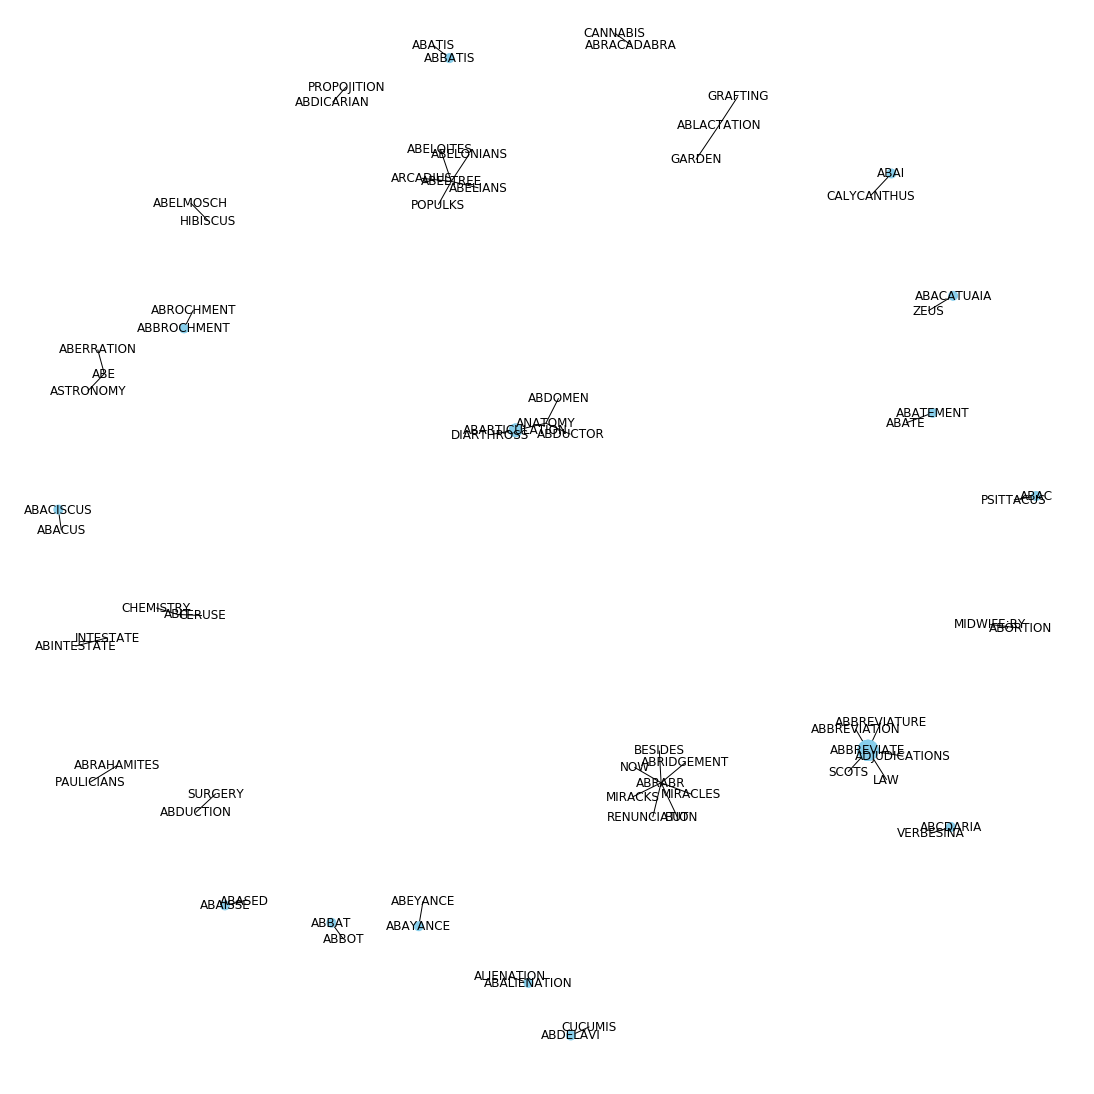

In [184]:
term_size = [graph_df.degree(t) * 80 for t in list_terms_update]

plt.figure(figsize=(15,15))
pos = nx.spring_layout(graph_df)
nx.draw(graph_df, with_labels=True, nodelist= list_terms_update, node_size= term_size, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.axis('off')
plt.show()

In [197]:
ABACISCUS_df= df_related_1771_vol1[df_related_1771_vol1['term'].str.contains("ABACISCUS")]
ABACISCUS_df

,term,definition,related_terms,num_article_words,header,page_num,term_id_in_page,type_article,edition_num,volume,letters,year,title,place,source_text_file
22,ABACISCUS,See ABACUS.,ABACUS,2,EncyclopaediaBritannica,15,15,Article,1,1,A-B,1771,"Encyclopaedia Britannica; or, A dictionary of ...",Edinburgh,nls-data-encyclopaediaBritannica/alto/18808290...


In [198]:
ABACISCUS_graph_df = create_graph_df(ABACISCUS_df, 50)

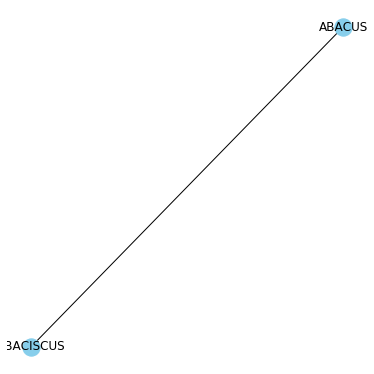

In [201]:
plt.figure(figsize=(5,5))
pos = nx.spring_layout(ABACISCUS_graph_df)
nx.draw(ABACISCUS_graph_df, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.axis('off')
plt.show()